In [7]:
! pip3 install qutip
! pip3 install seaborn

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 8.1 MB 10.3 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


In [28]:
from matplotlib import rc
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('../source')


import functions_utils as utils
rc('text', usetex=False)
plt.rcParams.update({
"text.usetex": False,
"font.family": "sans-serif",
"font.sans-serif": ["Helvetica"]})

In [29]:
def compute_phonon_spectrum(wavefunction, energy, material, device, which = "z"):
    if which == "z":
        utils.S_ph_z(wavefunction, energy, material, device)
    else:
        utils.S_ph_x(wavefunction, energy, material, device)


In [38]:
## Definition of the material is the dictionary
material = SiGe  #example
device = Petta
print("Device:", device)
print("Material:", material)

Device: {'lxy': 38, 'lz': 2.5, 'dx': 150, 'name': 'Petta'}
Material: {'rho': 22.135, 'Xiu': 5000000.0, 'Xid': 8770000.0, 'c': {'L': 9150.0, 'T': 5000.0}, 'p': 0, 'name': 'SiGe', 'sign': 4.654261342929703e-05}


In [39]:
a = sns.set(context="paper", style="whitegrid", font_scale=1.4,  palette='deep')

wavefunction = utils.fgauss  #gaussian wavefunction
material_device = zip([SiGe, GaAs], [Struck, Malinowski]) 
energies = np.logspace(0,3,101)

Sphx = []
Sphz = []
for mn,mat in enumerate(material_device):
    Sphx.append([utils.S_ph_x(wavefunction,e0,mat[1],mat[0]) for e0 in energies])
    Sphz.append([utils.S_ph_z(wavefunction,e0,mat[1],mat[0]) for e0 in energies])



/Users/krzywdaja/Documents/Old_docs_to_sort/Numeryki/DQD_COHERENCE/CLEAR/round2/Decoherence-in-spin-shuttling-code/code/notebooks/../source/functions_utils.py:104: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  I = integrate.quad(lambda th: sin(th) *D(mat)[pol](th)**2 *


TypeError: S_overf() got an unexpected keyword argument 'S1'

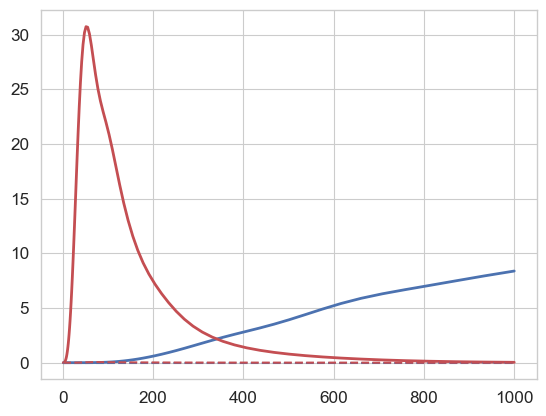

In [41]:

plt.plot(Es, Sphz[0], "b", lw=2, label="SiGe")
plt.plot(Es, Sphz[1], "r", lw=2, label="GaAs")
plt.plot(Es, Sphx[0], "--b", lw=1.5)
plt.plot(Es, Sphx[1], "--r", lw=1.5)


alpha = 1e-2
plt.plot(Es, [utils.S_overf(e0, S1 = 0.5,T =100) for e0 in Es], "k", lw=2, label="1/f")
plt.plot(Es, [utils.S_john1(e0,R = 50,T = 100)for e0 in Es], "b", lw=2, label="Johnson")
plt.plot(Es, [1e-2*utils.S_overf(e0,S1=0.5,T=100) for e0 in Es], "--k", lw=1.5)
plt.plot(Es, [1e-2*utils.S_john1(e0,R=50,T =100)for e0 in Es], "--b", lw=1.5)

plt.legend()
plt.xscale("log")
plt.yscale("log")
plt.ylim(1e-3,1e2)
plt.tick_params(which="both", left=True, bottom=True)
plt.xlabel(r"Energy $\Omega$ ($\mu eV$)")
plt.ylabel(r"Spectral density $S(\Omega)$ (ns $^{-1}$)")

ax = plt.twinx()
ax.set_yticks([])
ax.plot([],[],"-",color="gray",lw=2,label = r"$S_z$")
ax.plot([],[],"--",color="gray",lw=1.5,label = r"$S_x$")
ax.legend()

plt.savefig("AppB_spectral_density.png", dpi=200)